In [40]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
import os 
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
import pandas as pd
from bs4 import BeautifulSoup
import requests
import georasters as gr
import json
from rasterio.mask import mask


# checkpoint - shivagpandey

In [59]:
#page = requests.get('https://gimms.gsfc.nasa.gov/SMOS/SMAP/SMAP_10KM_tiff/').text
url = 'https://gimms.gsfc.nasa.gov/SMOS/SMAP/SMAP_10KM_tiff/'
soup = BeautifulSoup(requests.get(url).text)
hrefs = []
for a in soup.find_all('a'):
    if '.tif' in a['href']:
        hrefs.append(a['href'])

In [76]:
[d['features'][0]['geometry']]

[{'type': 'MultiPolygon',
  'coordinates': [[[[80.47000219000006, 16.94077449400004],
     [80.49342898000003, 16.926848929000073],
     [80.49703081500007, 16.95419154800004],
     [80.50442594400005, 16.95630071000005],
     [80.52656417800006, 16.947652034000043],
     [80.53319305200006, 16.96155575100005],
     [80.54515510500005, 16.956961207000063],
     [80.58104782700008, 16.936530901000026],
     [80.58416160600007, 16.928935403000025],
     [80.59693593700007, 16.924281586000063],
     [80.60108246100003, 16.917070024000054],
     [80.59233032300006, 16.90645566300003],
     [80.59621021100008, 16.88728166900006],
     [80.57780494600007, 16.879575488000057],
     [80.56893275400006, 16.869732790000057],
     [80.56961188500003, 16.84523973200004],
     [80.56344272600006, 16.833730298000035],
     [80.59369043500004, 16.80340588300004],
     [80.60532488100006, 16.797792709000078],
     [80.57746468200008, 16.779008962000034],
     [80.57031342100004, 16.768789670000046],
 

In [81]:
import subprocess as subp

cmd="mkdir download_ssm/website_downloads/full ; mkdir download_ssm/website_downloads/cog"
print(cmd)
try:
    subp.check_call(str(cmd), shell=True)
except:
    print("end")

for i in hrefs[:1]:
    with open('download_ssm/website_downloads/full/'+i, 'wb') as f:
        ret = requests.get(url+i, stream=True)
        for data in ret.iter_content(1024):
            f.write(data)
            
    data = rasterio.open('download_ssm/website_downloads/full/'+i)
    f = open('../../../../src/data_preprocessing/base_geojson/TL_state_shapefile_for_clip.geojson')
    d = json.load(f)
    geometry = [d['features'][0]['geometry']]
    out_img, out_transform = mask(data, geometry, crop=True)
    out_meta = data.meta
    out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "dtype":rasterio.float32,
                    "tiled":True,
                    "compress":'lzw'})

    #writing clipped file
    with rasterio.open('download_ssm/website_downloads/cog/Telangana_'+i, "w", **out_meta) as dest:
        dest.write(out_img)
    cmd="rm -r download_ssm/website_downloads/full"
    print(cmd)
    try:
        subp.check_call(str(cmd), shell=True)
    except:
        print("end")

mkdir download_ssm/website_downloads/full ; mkdir download_ssm/website_downloads/cog
rm -r download_ssm/website_downloads/full


# checkpoint end

In [19]:
path = r"SM//"

In [20]:
global_dataset = [ds for ds in os.listdir(path) if ds[-4:] == '.tif']

In [21]:
print("Imported", len(global_dataset), "items")

Imported 88 items


In [22]:
img = gdal.Open(path+"//"+global_dataset[0])

In [23]:
image = np.array(img.GetRasterBand(1).ReadAsArray())

In [24]:
print(image)

[[-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]
 ...
 [-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]]


In [25]:
dataset = [ds for ds in os.listdir(path) if ds[-4:] == '.tif']

In [26]:
def getImages(dataset,path):
    Imagedata = []
    for data in dataset:
        img = gdal.Open(path+"//"+data)
        image = np.array(img.GetRasterBand(1).ReadAsArray())
        Imagedata.append(image)
    return Imagedata

In [27]:
imagedata = getImages(dataset,path)

In [28]:
dataset = [imagedata]
columns = ["Year1"]

In [29]:
#data needs to be in the format 
#Year1  month1  pixel1 pixel2 pixel3
#Year1  month2  pixel1 pixel2 pixel3
count = 0;
from itertools import chain
yearlydata = []
df = pd.DataFrame()

for months in dataset:
    #print(len(months))
    yearlydata = []
    for month in months:
        monthlydatapixel = list(chain.from_iterable(month))
        #print(len(monthlydatapixel))
        yearlydata.append(monthlydatapixel)
    df = df.append(yearlydata)
   

In [30]:
#df = pd.DataFrame(data = dataset, columns = columns)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160
0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [31]:
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != -999).any(axis=0)]
df = df.T.reset_index(drop=True).T

In [32]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,2.549002,2.829386,2.829386,3.751292,4.225150,2.257778,3.173797,3.163929,3.163929,2.876361,...,2.116667,2.116667,2.357201,1.847273,1.847273,2.178894,2.532894,2.532894,2.125161,2.192698
1,4.188626,3.091398,3.091398,4.527487,6.681919,4.198399,3.451913,2.927097,2.927097,3.950414,...,7.561326,7.561326,5.984145,6.350387,1.847273,2.982864,5.280305,5.280305,7.252660,2.364489


In [33]:
df.to_csv("MaharashtraData.csv",index=True)

In [36]:
img = rasterio.open("C://Users//007sh//Desktop//UNDP//SM//NASA_USDA_SMAP_SM10.ssm.tif")

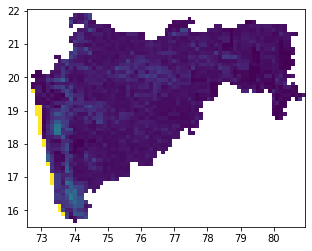

<AxesSubplot:>

In [37]:
show(img)

In [41]:
from raster2xyz.raster2xyz import Raster2xyz

input_raster = "C://Users//007sh//Desktop//UNDP//SM//NASA_USDA_SMAP_SM10.ssm.tif"
out_csv = "temp.csv"

rtxyz = Raster2xyz()
rtxyz.translate(input_raster, out_csv)

myRasterDF = pd.read_csv(out_csv)
myRasterDF=myRasterDF[myRasterDF["z"] != 0]
myRasterDF=myRasterDF[myRasterDF["z"] != -999]
myRasterDF.to_csv("Maharashtracoordinates.csv")

[2022-07-27 09:39:06 - INFO] - Getting geotransform and data...
[2022-07-27 09:39:06 - INFO] - Getting XYZ data...
[2022-07-27 09:39:06 - INFO] - Getting geotransformed coordinates...
[2022-07-27 09:39:06 - INFO] - Building XYZ data...
[2022-07-27 09:39:06 - INFO] - New XYZ (csv file) created...
